importing

In [1]:
#importing 
import pandas as pd
import numpy as np
import os

In [2]:
ords = pd.read_pickle(r"C:\Users\bodhi\Downloads\instacart basket analysis\data\prepared data\ords_prods_merge_5.pkl")

task

In [25]:
def state_to_region(row):
    state = row['State']
    
    # Northeast states
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
                'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        return 'North East'
    
    # Midwest states
    if state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota',
                'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        return 'Midwest'
    
    # South states
    if state in ('Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
                'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
                'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        return 'South'
    
    # West states
    if state in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
                'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        return 'West'
    
    return 'Not enough data'

In [26]:
ords['region'] = ords.apply(state_to_region, axis=1)

In [27]:
crosstab = pd.crosstab(ords['region'], ords['spending_flag'], dropna = False)

In [28]:
crosstab

spending_flag,high_spender,low_spender
region,,
Midwest,155975,7441350
North East,108225,5614511
Not enough data,16600,620424
South,193091,9961770
West,160354,8132559


3. there doesnt seem to be much difference in spending habits accross regions

In [35]:
ords.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,fam_status,income,order_id,...,price_range_loc,bussiest_days,bussiest_hours,max_order,loyalty_flag,spending_flag,order_frequency,region,low_activity_customer,customer_profile
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,518967,...,Low-range product,Regularly busy,average orders,8,New customer,low_spender,regular_customer,Midwest,No,older_married
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,423547,...,Mid-range product,Regularly busy,average orders,8,New customer,low_spender,regular_customer,Midwest,No,older_married
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2524893,...,Mid-range product,Least busy,most orders,8,New customer,low_spender,regular_customer,Midwest,No,older_married
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2524893,...,Low-range product,Least busy,most orders,8,New customer,low_spender,regular_customer,Midwest,No,older_married
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,married,165665,2524893,...,Mid-range product,Least busy,most orders,8,New customer,low_spender,regular_customer,Midwest,No,older_married


In [30]:
ords.dtypes

user_id                     object
First Name                category
Surname                   category
Gender                    category
State                     category
Age                          int64
date_joined               category
fam_status                category
income                       int64
order_id                     int32
eval_set                  category
order_number                  int8
order_dow                     int8
order_hour_of_day             int8
days_since_prior_order     float16
order_type                category
product_id                   int32
add_to_cart_order            int32
product_name              category
aisle_id                     int64
department_id                int64
match                     category
price_range_loc           category
bussiest_days             category
bussiest_hours            category
max_order                     int8
loyalty_flag              category
spending_flag             category
order_frequency     

In [31]:
# exclusion flag low activity customers
ords['low_activity_customer'] = ords['max_order'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [32]:
#exporting
ords.to_pickle(r"C:\Users\bodhi\Downloads\instacart basket analysis\data\prepared data\ords_prods_merge_flagged.pkl")

In [40]:
#customer profile
conditions = [
    (ords['Age'] > 35) & (ords['fam_status'] == 'married'),
    (ords['Age'] <= 35) & (ords['fam_status'] == 'married'),
    (ords['Age'] > 35) & (ords['fam_status'] == 'single'),
    (ords['Age'] <= 35) & (ords['fam_status'] == 'single')
]
values = ['older_married', 'younger_married', 'older_single', 'younger_single']
ords['customer_profile'] = np.select(conditions, values, default='not enough data')

In [38]:
#importing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<Axes: xlabel='customer_profile'>

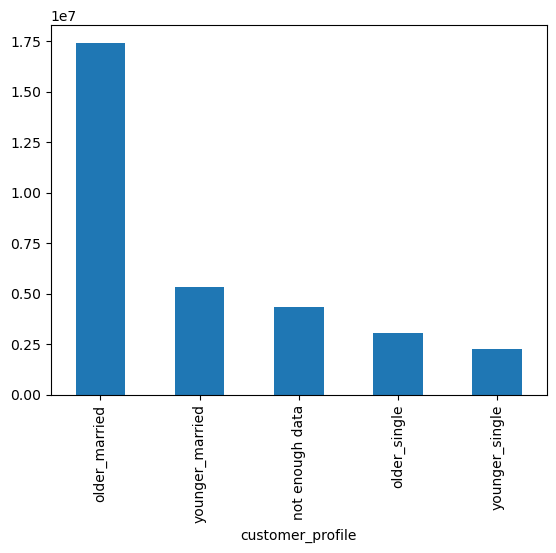

In [41]:
#visualising customer profile
ords['customer_profile'].value_counts().plot.bar()

In [47]:
#comparing customer profiles accross regions
compare = pd.crosstab(ords['region'], ords['customer_profile'], dropna = False)

In [48]:
compare

customer_profile,not enough data,older_married,older_single,younger_married,younger_single
region,,,,,
Midwest,1012918,4091295,744894,1234313,513905
North East,769173,3096842,501532,939479,415710
Not enough data,88288,332129,61240,107411,47956
South,1362145,5447830,942776,1673272,728838
West,1089891,4469063,799027,1365119,569813


In [50]:
#comparing customer profiles accross department id
compare1 = pd.crosstab(ords['department_id'], ords['customer_profile'], dropna = False)

In [51]:
compare1

customer_profile,not enough data,older_married,older_single,younger_married,younger_single
department_id,,,,,
1,302108,1202882,209363,366168,154222
2,4913,19337,3541,5868,2632
3,156543,629686,110459,192195,83545
4,1262462,5101048,896764,1553170,665847
5,21511,80509,15645,25173,10858
6,36134,144286,25248,44180,19405
7,355654,1452820,254039,436232,189378
8,14029,52465,9117,15048,7057
9,115922,467059,79997,142604,61045


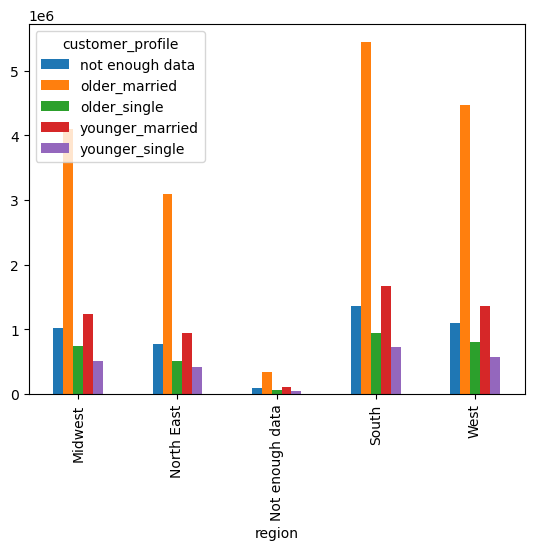

In [58]:
bar1 = compare.plot.bar()

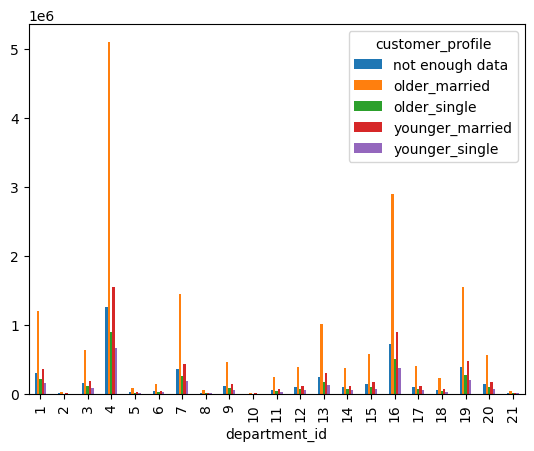

In [57]:
bar2 = compare1.plot.bar()

the customer profiles seem to be very normally distributed between each department id and region

In [10]:
#count of orders across departments
count = ords['department_id'].value_counts()

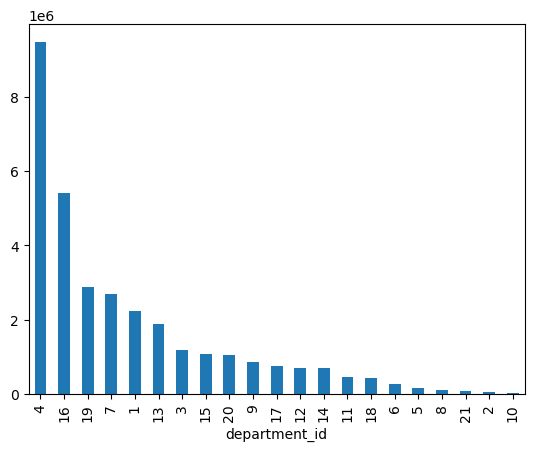

In [6]:
bar3 = count.plot.bar()


In [9]:
#count of orders across departments
count1 = ords['price_range_loc'].value_counts()

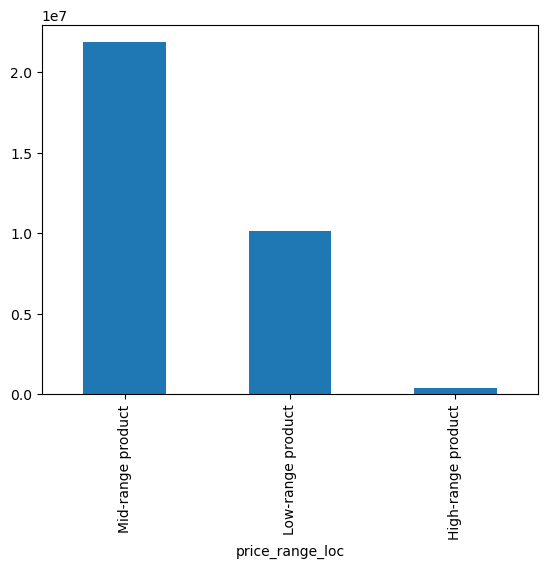

In [11]:
bar4 = count1.plot.bar()

In [62]:
#exporting visualisations
bar1.figure.savefig(r"C:\Users\bodhi\Downloads\instacart basket analysis\analysis\visualisations\bar-profile-region")
bar2.figure.savefig(r"C:\Users\bodhi\Downloads\instacart basket analysis\analysis\visualisations\bar-profile-dep")

In [7]:
bar3.figure.savefig(r"C:\Users\bodhi\Downloads\instacart basket analysis\analysis\visualisations\bar-dep-counts")